# 2.4.2 [Multivariate Least Squares](https://courses.thinkful.com/data-201v1/project/2.4.2)

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  
* Robbery and Murder are currently continuous variables.  Create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  
* Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"
            )
df_crime = pd.read_csv(data_path, header=None, delimiter=',')
df_crime.columns = list(df_crime.iloc[4,:])
df_crime.columns = df_crime.columns.str.replace('\n', '_').str.replace(' ', '_').str.lower()
df_crime = df_crime.rename({'murder_and_nonnegligent_manslaughter':'murder'},axis='columns')

df_crime = df_crime.iloc[5:-3,:].reset_index(drop=True)

In [3]:
# Create Murder and Crime flags
# must remove commas to be converted to a datatype that can use np.where
df_crime.murder = np.where(df_crime.murder.str.replace(',','').astype('int64')>0,1,0) 
df_crime.robbery = np.where(df_crime.robbery.str.replace(',','').astype('int64')>0,1,0)

In [4]:
# Create population_squared metric. Must also remove commas and conver datatype
df_crime.population = df_crime.population.str.replace(',','').astype('int64')
df_crime['population_squared'] = df_crime.population**2

In [53]:
# Clean property_crime metric. Must also remove commas and conver datatype
df_crime.property_crime = df_crime.property_crime.str.replace(',','').astype('int64')

In [5]:
df_crime.columns

Index(['city', 'population', 'violent_crime', 'murder',
       'rape_(revised_definition)1', 'rape_(legacy_definition)2', 'robbery',
       'aggravated_assault', 'property_crime', 'burglary', 'larceny-_theft',
       'motor_vehicle_theft', 'arson3', 'population_squared'],
      dtype='object')

In [17]:
df_crime.describe().iloc[3:,0]

min        526.0
25%       3003.0
50%       7233.5
75%      18427.5
max    8396126.0
Name: population, dtype: float64

In [57]:
df_crime.describe()#.iloc[3:,0]

,population,murder,robbery,property_crime,population_squared
count,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02
mean,4.003763e+04,0.140805,0.600575,792.606322,2.035547e+11
std,4.500374e+05,0.348321,0.490486,7659.724746,3.778876e+12
min,5.260000e+02,0.000000,0.000000,0.000000,2.766760e+05
25%,3.003000e+03,0.000000,0.000000,40.500000,9.018117e+06
50%,7.233500e+03,0.000000,1.000000,112.500000,5.232568e+07
75%,1.842750e+04,0.000000,1.000000,341.000000,3.397536e+08
max,8.396126e+06,1.000000,1.000000,141971.000000,7.049493e+13


In [63]:
crime_restricted = df_crime[df_crime['property_crime']<20000].reset_index(drop=True)

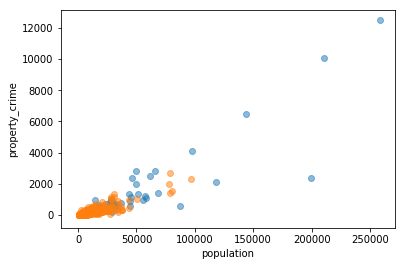

In [69]:
plt.scatter(x=crime_restricted[crime_restricted['murder']==1].population, 
            y=crime_restricted[crime_restricted['murder']==1].property_crime, alpha=0.5)
plt.scatter(x=crime_restricted[crime_restricted['murder']==0].population, 
            y=crime_restricted[crime_restricted['murder']==0].property_crime, alpha=0.5)
plt.xlabel('population')
plt.ylabel('property_crime')
plt.show()

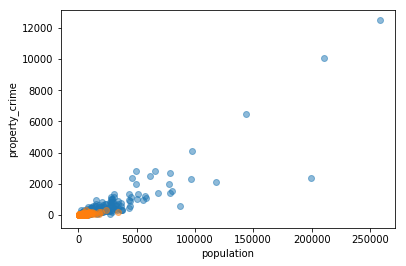

In [68]:
plt.scatter(x=crime_restricted[crime_restricted['robbery']==1].population, 
            y=crime_restricted[crime_restricted['robbery']==1].property_crime, alpha=0.5)
plt.scatter(x=crime_restricted[crime_restricted['robbery']==0].population, 
            y=crime_restricted[crime_restricted['robbery']==0].property_crime, alpha=0.5)
plt.xlabel('population')
plt.ylabel('property_crime')
plt.show()

(0, 20000)

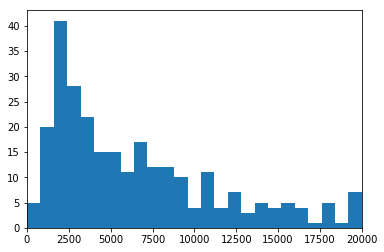

In [23]:
plt.hist(df_crime['population'], 
         bins=25, 
         range=(0,20000))
plt.xlim(0,20000)

{'whiskers': [<matplotlib.lines.Line2D at 0xa1be1e2e8>,
 'caps': [<matplotlib.lines.Line2D at 0xa1be1eba8>,
 'boxes': [<matplotlib.lines.Line2D at 0xa1be1e198>],
 'medians': [<matplotlib.lines.Line2D at 0xa1be28438>],
 'fliers': [<matplotlib.lines.Line2D at 0xa1be28860>],
 'means': []}

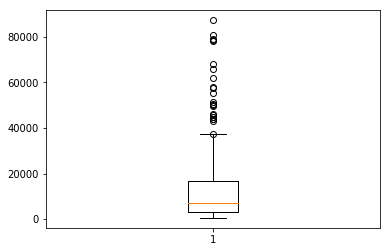

In [31]:
plt.boxplot(df_crime[df_crime['population']<90000]['population'])

In [15]:
df_crime.describe().loc['25%','population']
df_crime.describe().loc['25%','population']
df_crime.describe().loc['25%','population']

3003.0

In [142]:
df_crime.population.mean()
df_crime.population.sort_values()

118        526
319        615
136        656
12         658
44         762
344        829
287        872
266        977
48         980
260        997
25        1022
227       1097
87        1104
77        1122
34        1174
200       1263
256       1274
157       1350
293       1351
238       1385
23        1410
149       1428
242       1433
295       1437
128       1553
258       1602
208       1622
75        1628
186       1688
307       1691
        ...   
108      43214
334      43777
263      43866
127      44787
338      44821
134      45535
22       46304
218      49574
315      49898
301      50603
152      51506
140      55198
340      57559
314      58082
321      61686
285      66041
206      68071
62       78215
53       78361
214      78800
57       80705
267      87204
126      96667
3        97956
7       118296
310     143834
346     199134
272     210562
35      258789
216    8396126
Name: population, Length: 348, dtype: int64

In [55]:
crime_subset = df_crime[['property_crime', 'population', 'population_squared', 'murder', 'robbery' ]]

In [95]:
crime_subset.population.describe()

count    3.480000e+02
mean     4.003763e+04
std      4.500374e+05
min      5.260000e+02
25%      3.003000e+03
50%      7.233500e+03
75%      1.842750e+04
max      8.396126e+06
Name: population, dtype: float64

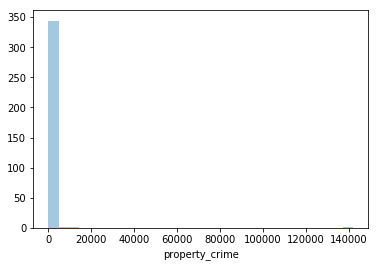

In [56]:
sns.distplot(crime_subset.property_crime, bins=30, kde=False)

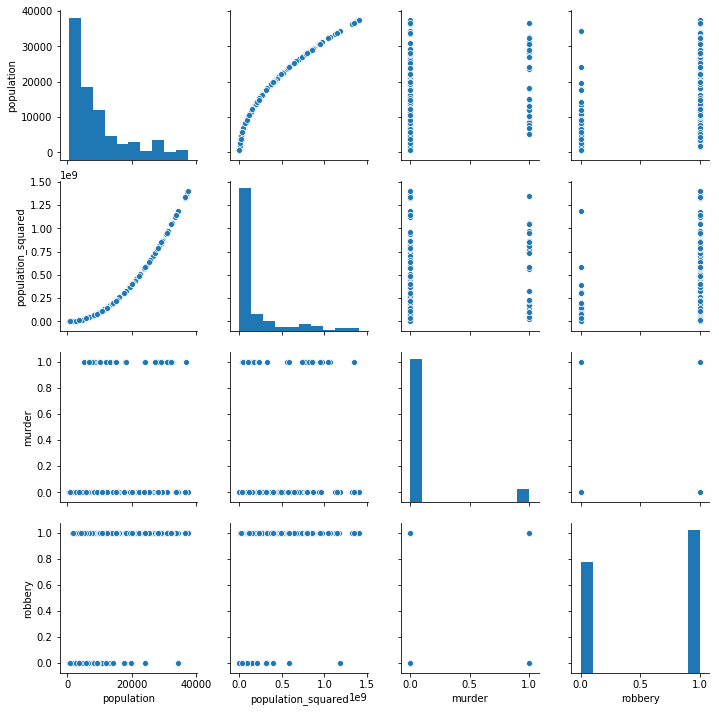

In [34]:
import seaborn as sns
sns.pairplot(data=crime_subset[crime_subset['population']<40000])

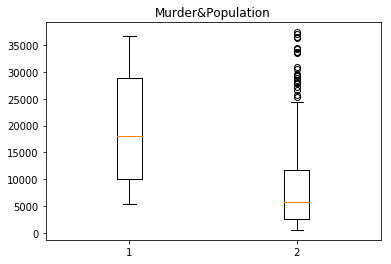

In [46]:
fig, ax = plt.subplots()
murder = [crime_subset[(crime_subset['population']<40000)&(crime_subset['murder']==1)]['population'],crime_subset[(crime_subset['population']<40000)&(crime_subset['murder']==0)]['population']]
plt.title('Murder&Population')
ax.set_xticklabels(labels=['murder', 'no murder'])
ax.boxplot(murder)
plt.show()

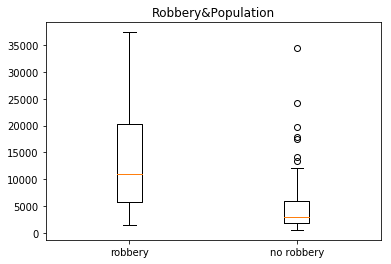

In [50]:
fix, ax = plt.subplots()
robbery = [crime_subset[(crime_subset['population']<40000)&(crime_subset['robbery']==1)]['population'],
        crime_subset[(crime_subset['population']<40000)&(crime_subset['robbery']==0)]['population']]
plt.title('Robbery&Population')
ax.boxplot(robbery)
ax.set_xticklabels(labels=['robbery', 'no robbery'])
plt.show()